In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv("churn_rate.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
new_df_x = df.iloc[:,3:-1]
new_df_x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [21]:
 X = new_df_x.values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [19]:
new_df_y = df.iloc[:,-1]
new_df_y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [23]:
Y = new_df_y.values
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [24]:
L = LabelEncoder()
X[:,2] = L.fit_transform(X[:,2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [25]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
print(X_train)

[[1.0 0.0 0.0 ... 1 1 55796.83]
 [1.0 0.0 0.0 ... 1 0 19823.02]
 [1.0 0.0 0.0 ... 0 1 13848.58]
 ...
 [1.0 0.0 0.0 ... 1 0 181429.87]
 [0.0 0.0 1.0 ... 1 1 148750.16]
 [0.0 1.0 0.0 ... 1 0 118855.26]]


In [73]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7000, 12)
(3000, 12)
(7000,)
(3000,)


In [77]:
Y_train = Y_train.reshape(7000,1)
Y_train.shape

Y_test = Y_test.reshape(3000,1)
Y_test.shape

(3000, 1)

In [78]:
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

In [79]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

print(X_train)


[[ 0.9849701  -0.5698719  -0.57317126 ...  0.6419848   0.9668353
  -0.7686243 ]
 [ 0.9849701  -0.5698719  -0.57317126 ...  0.6419848  -1.0343022
  -1.3935989 ]
 [ 0.9849701  -0.5698719  -0.57317126 ... -1.5576694   0.9668353
  -1.497393  ]
 ...
 [ 0.9849701  -0.5698719  -0.57317126 ...  0.6419848  -1.0343022
   1.4140042 ]
 [-1.0152593  -0.5698719   1.7446791  ...  0.6419848   0.9668353
   0.84625804]
 [-1.0152593   1.7547803  -0.57317126 ...  0.6419848  -1.0343022
   0.32689264]]


In [82]:
ANN = tf.keras.models.Sequential()
ANN.add(tf.keras.Input(shape = (12,)))
ANN.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ANN.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [86]:
ANN.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ANN.fit(X_train, Y_train, batch_size = 25, epochs = 200)

Epoch 1/200
280/280 [==============================] - 1s 853us/step - loss: 0.3311 - accuracy: 0.8661
Epoch 2/200
280/280 [==============================] - 0s 903us/step - loss: 0.3310 - accuracy: 0.8663
Epoch 3/200
280/280 [==============================] - 0s 921us/step - loss: 0.3310 - accuracy: 0.8674
Epoch 4/200
280/280 [==============================] - 0s 846us/step - loss: 0.3311 - accuracy: 0.8660
Epoch 5/200
280/280 [==============================] - 0s 871us/step - loss: 0.3311 - accuracy: 0.8670
Epoch 6/200
280/280 [==============================] - 0s 853us/step - loss: 0.3311 - accuracy: 0.8650
Epoch 7/200
280/280 [==============================] - 0s 864us/step - loss: 0.3309 - accuracy: 0.8660
Epoch 8/200
280/280 [==============================] - 0s 825us/step - loss: 0.3310 - accuracy: 0.8653
Epoch 9/200
280/280 [==============================] - 0s 814us/step - loss: 0.3314 - accuracy: 0.8649
Epoch 10/200
280/280 [==============================] - 0s 825us/step - l

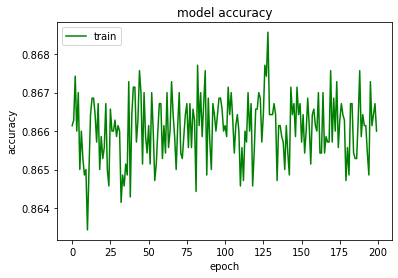

In [90]:
import matplotlib.pyplot as plt
plt.title('model accuracy')
plt.plot(history.history['accuracy'], color = "green")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

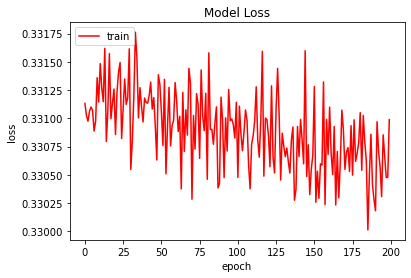

In [91]:
plt.title('Model Loss')
plt.plot(history.history['loss'], color = 'red')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [93]:
print(ANN.predict(ss.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
print(ANN.predict(ss.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 2s 2s/step
[[0.02236415]]
1/1 [==============================] - 0s 13ms/step
[[False]]


In [96]:
y_pred = ANN.predict(X_test)
print(y_pred)

94/94 [==============================] - 0s 635us/step
[[0.30551794]
 [0.3275727 ]
 [0.16382344]
 ...
 [0.12646028]
 [0.00892771]
 [0.69948846]]


In [98]:
classifier = (y_pred > 0.5)
classifier

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [100]:
print(np.concatenate((classifier.reshape(len(classifier),1), Y_test.reshape(len(Y_test),1)), 1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [101]:
cf = confusion_matrix(Y_test, classifier)
print("Confusion Matrix:", cf)
print("Accuracy score is:", accuracy_score(Y_test, classifier))

Confusion Matrix: [[2248  131]
 [ 292  329]]
Accuracy score is: 0.859


In [103]:
pred = np.concatenate((classifier.reshape(len(classifier),1), Y_test.reshape(len(Y_test),1)), 1)
pd.DataFrame(pred).to_csv("Predictions")